In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 所有(m,m1)的帕累托最优

In [13]:
def get_pareto(m, m1):
    res = np.load("result_"+str(m)+str(m1)+"_new.npy")

    # 绘制 burden - quality tradeoff
    x = []
    y = []
    text = []
    pareto = []
    sig = 0.0
    Sig = []
    for i in range(len(res)):
        x.append(res[i][0][0] / 1746)
        y.append(res[i][0][1] / (5000))
        text.append(res[i][1])
        sig += res[i][0][3]
        Sig.append(res[i][0][3])
    for i in range(len(res)):
        flag = 1
        for j in range(len(res)):
            if(i == j):
                continue
            if (x[j] < x[i] and y[j] > y[i]) or (x[j] == x[i] and y[j] > y[i]) or (x[j] < x[i] and y[j] == y[i]):
                flag = 0
        if(flag == 1):
            pareto.append([x[i], y[i], res[i][0][2], text[i][0], text[i][1], text[i][2]])

    # plt.figure(figsize=(15, 6),dpi=200)
    # plt.title("tradeoff when m="+str(m)+", m1="+str(m1))
    # plt.xlabel("Review Burden")
    # plt.ylabel("Conference Quality")
    # #plt.xticks(np.arange(2.0,5.1,0.1))
    # plt.scatter(x, y, 1, 'b')
    # for i in pareto:
    #     plt.scatter(i[0], i[1], 1, 'r')
    # plt.show()

    # print(len(pareto))
    # print(len(res))
    print(f"average sig of {m} {m1} : ", sig/len(res))
    #print(Sig)
    return np.array(pareto).transpose()

average sig of 1 2 :  0.004754673770357294
average sig of 1 3 :  0.0041898223781506126
average sig of 1 4 :  0.00403123724319223
average sig of 1 5 :  0.003699689596857073
average sig of 1 6 :  0.0036040084648470663
average sig of 2 3 :  0.0040889108714420325
average sig of 2 4 :  0.003923410064392643
average sig of 2 5 :  0.003585851414809815
average sig of 2 6 :  0.0034921424811985057
average sig of 3 4 :  0.003690547558660695
average sig of 3 5 :  0.0033702358249385377
average sig of 3 6 :  0.003261548488356889


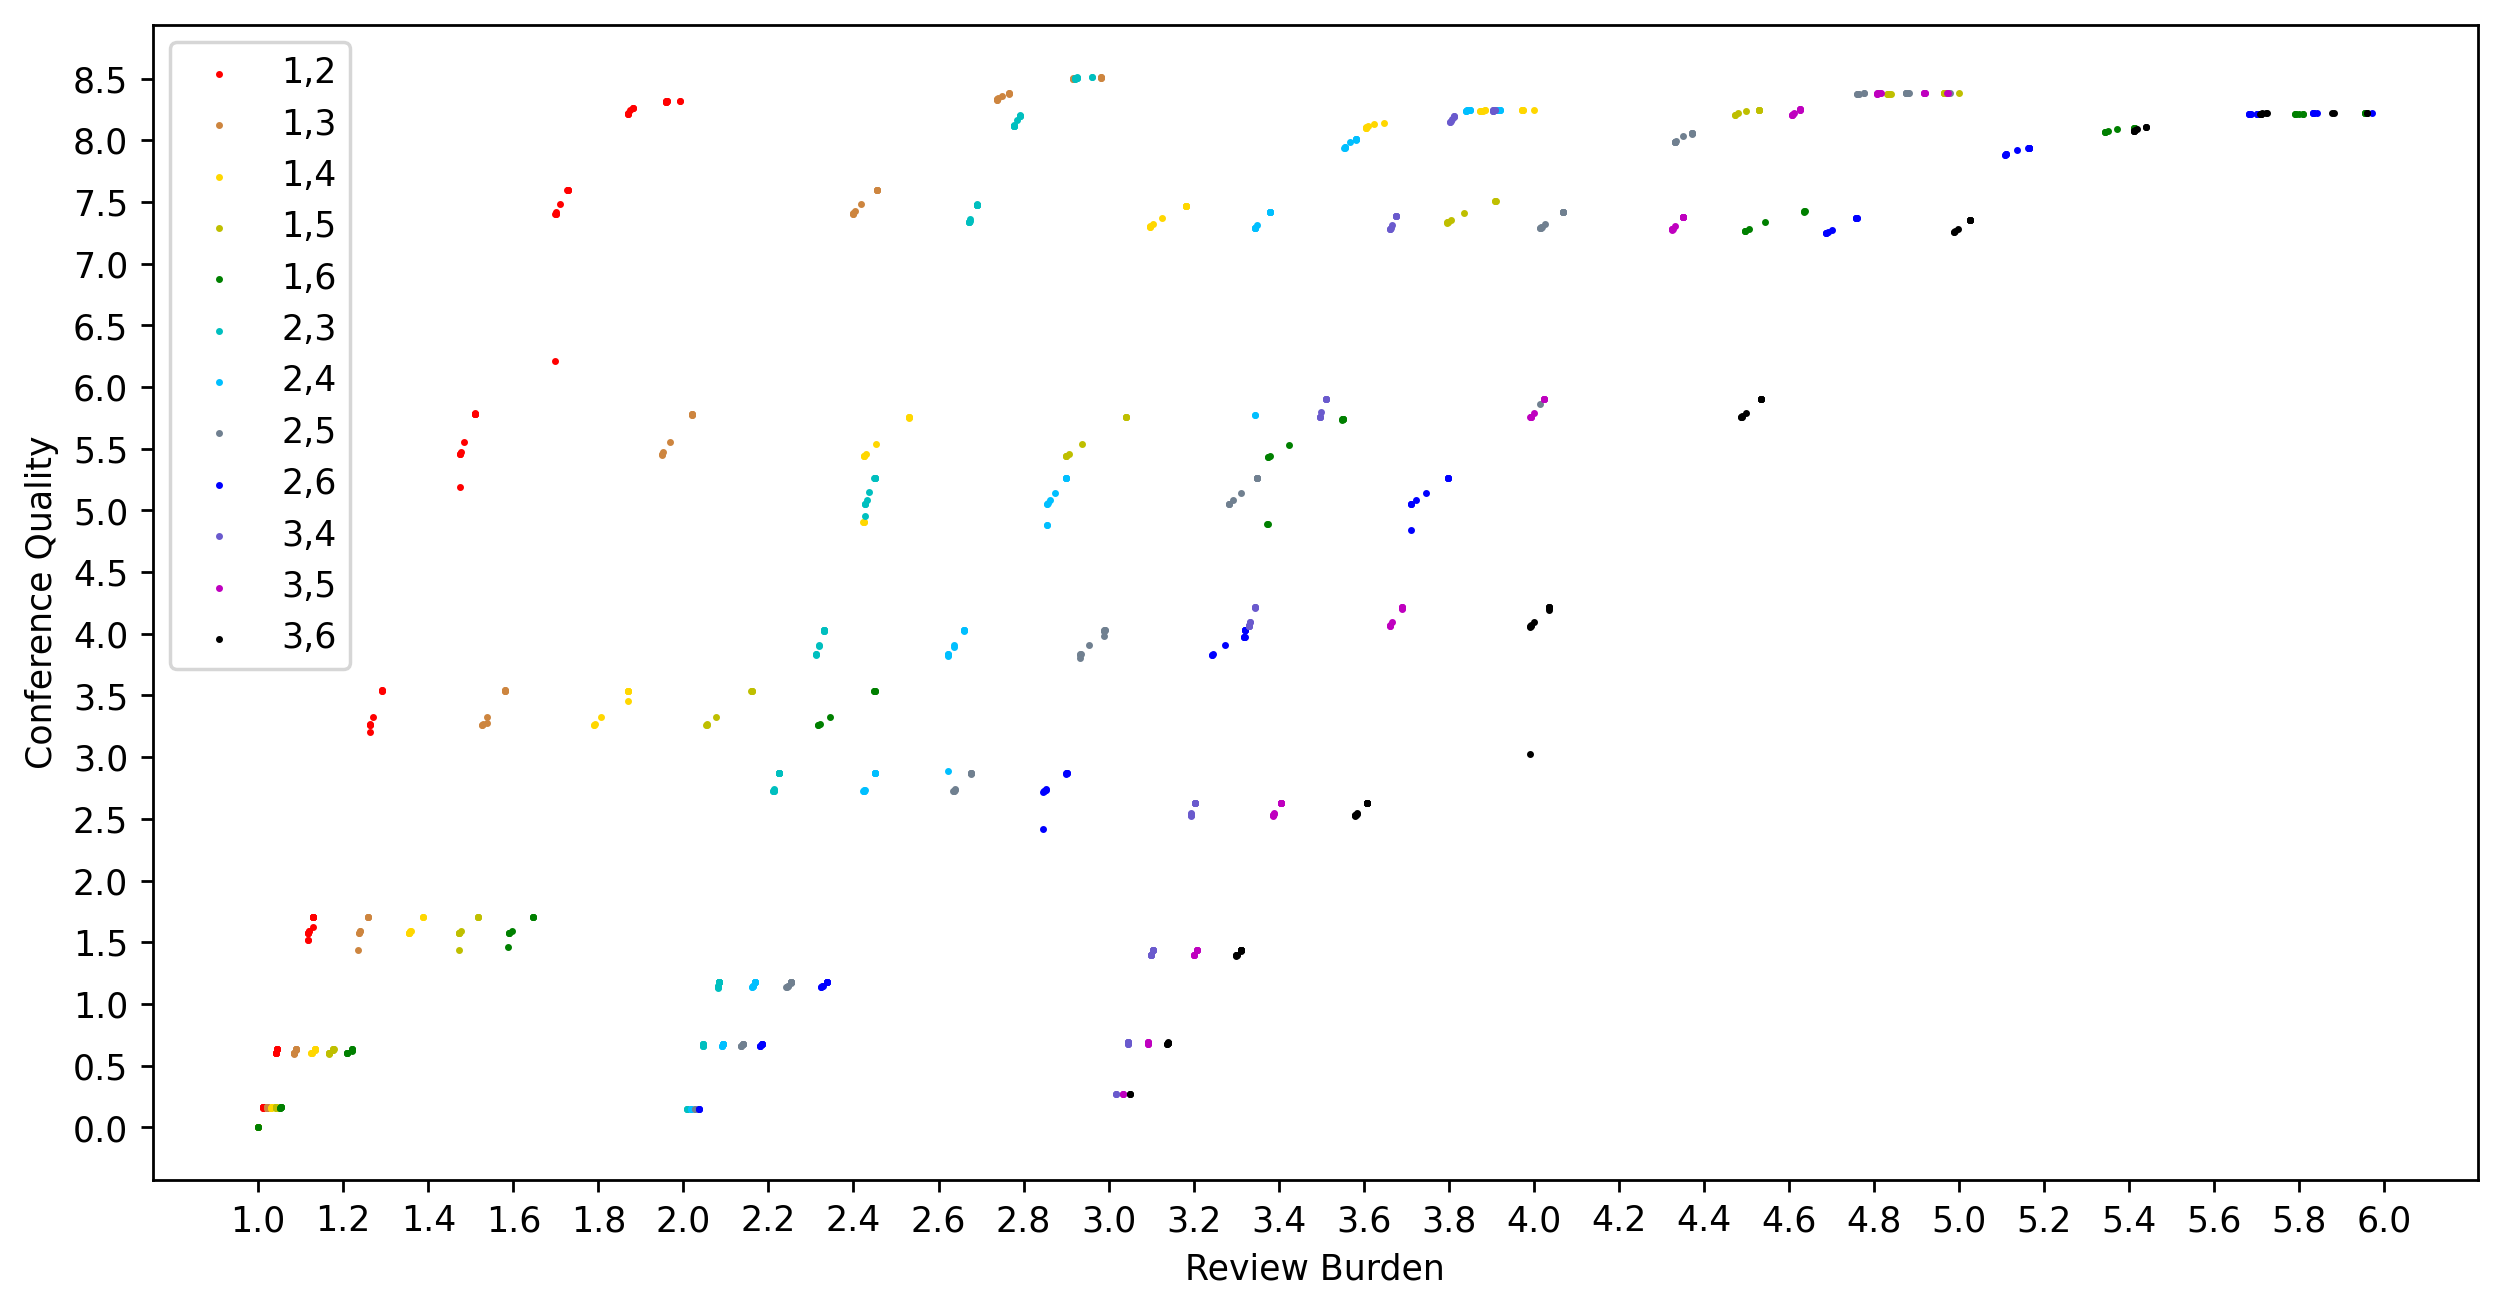

In [14]:
all_pareto = []

plt.figure(dpi=250, figsize=(12, 6))

temp = get_pareto(1, 2)
plt.scatter(temp[0], temp[1], 1, 'r', label='1,2')
all_pareto.extend(temp)

temp = get_pareto(1, 3)
plt.scatter(temp[0], temp[1], 1, 'peru', label='1,3')
all_pareto.extend(temp)

temp = get_pareto(1, 4)
plt.scatter(temp[0], temp[1], 1, 'gold', label='1,4')
all_pareto.extend(temp)

temp = get_pareto(1, 5)
plt.scatter(temp[0], temp[1], 1, 'y', label='1,5')
all_pareto.extend(temp)

temp = get_pareto(1, 6)
plt.scatter(temp[0], temp[1], 1, 'g', label='1,6')
all_pareto.extend(temp)

temp = get_pareto(2, 3)
plt.scatter(temp[0], temp[1], 1, 'c', label='2,3')
all_pareto.extend(temp)

temp = get_pareto(2, 4)
plt.scatter(temp[0], temp[1], 1, 'deepskyblue', label='2,4')
all_pareto.extend(temp)

temp = get_pareto(2, 5)
plt.scatter(temp[0], temp[1], 1, 'slategray', label='2,5')
all_pareto.extend(temp)

temp = get_pareto(2, 6)
plt.scatter(temp[0], temp[1], 1, 'b', label='2,6')
all_pareto.extend(temp)

temp = get_pareto(3, 4)
plt.scatter(temp[0], temp[1], 1, 'slateblue', label='3,4')
all_pareto.extend(temp)

temp = get_pareto(3, 5)
plt.scatter(temp[0], temp[1], 1, 'm', label='3,5')
all_pareto.extend(temp)

temp = get_pareto(3, 6)
plt.scatter(temp[0], temp[1], 1, 'black', label='3,6')
all_pareto.extend(temp)

plt.xticks(np.arange(1, 6.1, 0.2))
plt.yticks(np.arange(0, 8.6, 0.5))
plt.xlabel("Review Burden")
plt.ylabel("Conference Quality")

plt.legend()
plt.show()

# (2,4) 时的 burden quality tradeff

In [94]:
def analysis(m, m1):
    res = np.load("result_"+str(m)+str(m1)+"_new.npy")

    # 绘制 burden - quality tradeoff
    x = []
    y = []
    text = []
    color = []
    label = []
    num = []
    for i in res:
        if(i[1][1] > i[1][0]):
            continue
        x.append(i[0][0] / 1746)
        y.append(i[0][1] / 5000)
        text.append(i[1])
        if(i[1][2] == 4.5):
            color.append('r')
        elif(i[1][2] == 5.5):
            color.append('g')
        elif(i[1][2] == 6.5):
            color.append('b')
        num.append(round(i[0][2],2))
    plt.figure(figsize=(15, 6),dpi=200)
    plt.title("tradeoff when m="+str(m)+", m1="+str(m1))
    plt.xlabel("Review Burden")
    plt.ylabel("Conference Quality")
    plt.scatter(x, y, 1, color)
    plt.scatter(x[0], y[0], 1, 'r', label="t_acc = 4.5")
    plt.scatter(x[1], y[1], 1, 'g', label="t_acc = 5.5")
    plt.scatter(x[2], y[2], 1, 'b', label="t_acc = 6.5")
    for i in range(len(text)):
        if(x[i] >= 2.75 and text[i][0] == 8.0):
            if(text[i][2] == 4.5):
                plt.text(x[i]-0.03, y[i]+0.2, num[i], fontsize = 5)
            else:
                plt.text(x[i]-0.03, y[i]-0.2, num[i], fontsize = 5)
        if(x[i] >= 2.25 and x[i] <= 2.75 and text[i][0] == 8.0):
            if(text[i][2] == 4.5):
                plt.text(x[i]-0.03, y[i]+0.2, num[i], fontsize = 5)
            elif(text[i][2] == 6.5):
                plt.text(x[i]-0.03, y[i]-0.2, num[i], fontsize = 5)
        if(x[i] <= 2.25 and text[i][0] == 8.0 and text[i][2] == 6.5):
            plt.text(x[i]-0.03, y[i]-0.2, num[i], fontsize = 5)
        if(x[i] >= 3.00 and text[i][0] == text[i][1]):
            if(text[i][2] != 4.5):
                plt.text(x[i]-0.01, y[i]+0.2, num[i], fontsize = 5)
            else:
                plt.text(x[i]-0.01, y[i]-0.2, num[i], fontsize = 5)
        if(x[i] >= 2.75 and x[i] <= 3.00 and text[i][0] == text[i][1]):
            if(text[i][2] == 4.5):
                plt.text(x[i]-0.01, y[i]+0.2, num[i], fontsize = 5)
            else:
                plt.text(x[i]-0.01, y[i]-0.2, num[i], fontsize = 5)
        if(x[i] >= 2.25 and x[i] <= 2.75 and text[i][0] == text[i][1]):
            if(text[i][2] == 4.5):
                plt.text(x[i]-0.01, y[i]+0.2, num[i], fontsize = 5)
            elif(text[i][2] == 6.5):
                plt.text(x[i]-0.01, y[i]-0.2, num[i], fontsize = 5) 
        if(x[i] >= 2.75 and x[i] <= 3.00):
            print(x[i], " ", y[i], " ", text[i])
    plt.legend()
    #plt.xticks(np.arange(2.0,5.1,0.1))       
    plt.show()    

2.8990458190148916   5.262676524829221   [5.5 5.5 4.5 0. ]
2.898937686139748   5.046736905357098   [5.5 5.5 5.5 0. ]
2.8990082474226804   3.048799524855073   [5.5 5.5 6.5 0. ]
2.87360412371134   5.142884936937917   [6.  5.5 4.5 0. ]
2.874331271477663   4.968561071972979   [6.  5.5 5.5 0. ]
2.8738483390607104   3.0460749821460915   [6.  5.5 6.5 0. ]
2.8617074455899196   5.083879906775627   [6.5 5.5 4.5 0. ]
2.8616471935853376   4.909545884982344   [6.5 5.5 5.5 0. ]
2.861544558991982   3.0396286868600004   [6.5 5.5 6.5 0. ]
2.85639587628866   5.056408428333774   [7.  5.5 4.5 0. ]
2.8558045819014892   4.8793614152471125   [7.  5.5 5.5 0. ]
2.856063001145475   3.0264316750209894   [7.  5.5 6.5 0. ]
2.8556169530355096   5.052130303410562   [7.5 5.5 4.5 0. ]
2.855464146620848   4.877801254865239   [7.5 5.5 5.5 0. ]
2.8557328751431843   3.02537732164753   [7.5 5.5 6.5 0. ]
2.855688888888889   5.052682470492265   [8.  5.5 4.5 0. ]
2.8555780068728525   4.878200961982876   [8.  5.5 5.5 0. ]
2.85

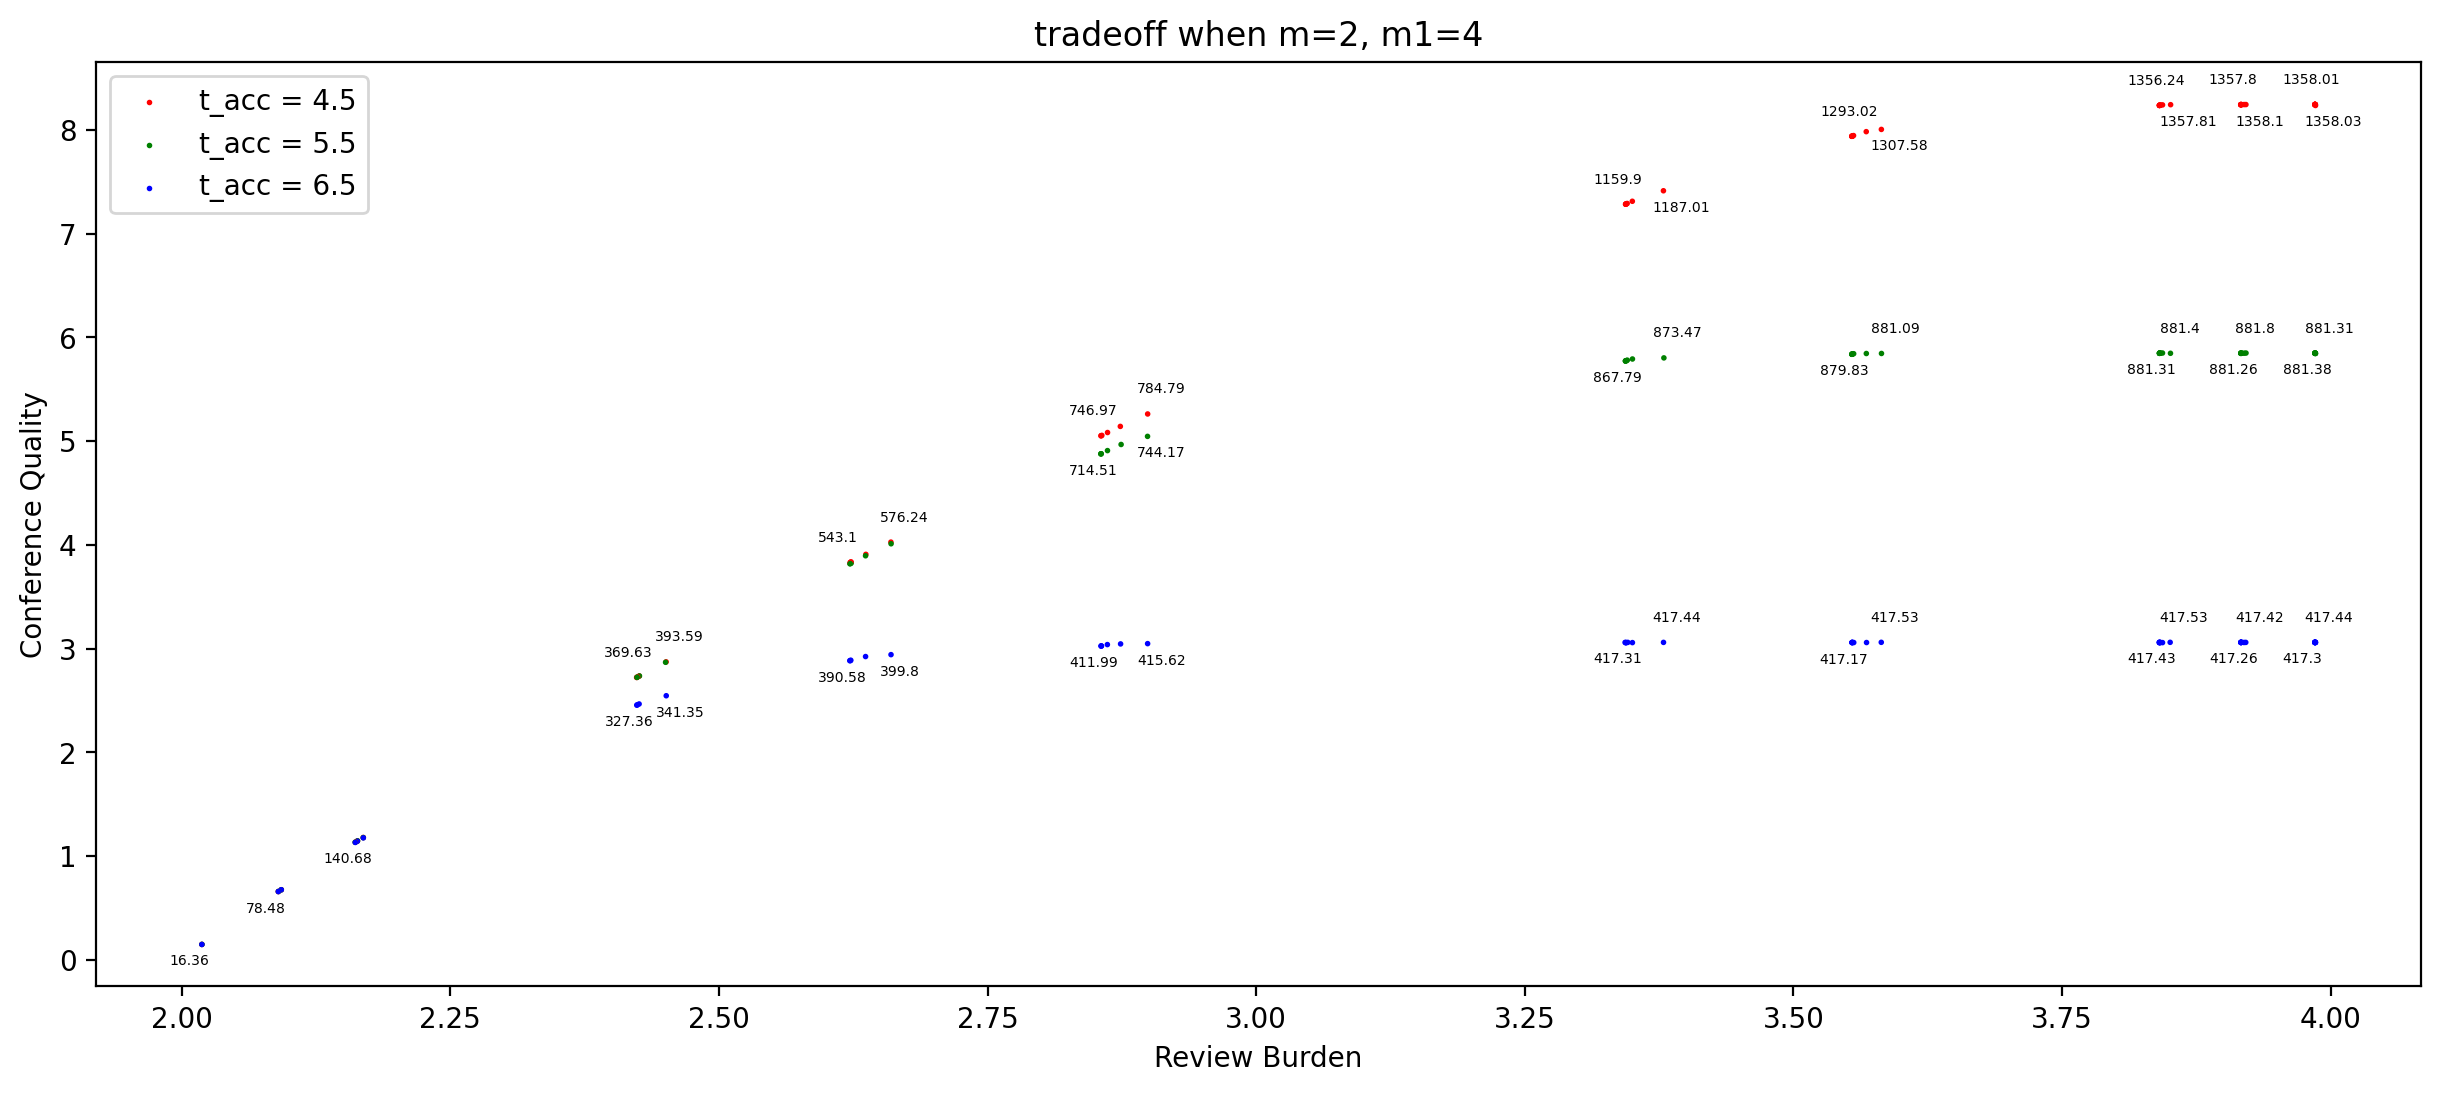

In [95]:
analysis(2,4)

# t1和t_acc不变，t2改变 

In [96]:
def analysis_t2():
    #t1不变，t2变化
    res = np.load("result_24_t2_2_new.npy")
    print(res[0])
    print(res[1])
    # 绘制 burden - quality tradeoff
    x = []
    y = []
    t2 = []
    text = []
    for i in res:
        x.append(i[0][0] / 1746)
        y.append(i[0][1] / (5000))
        text.append(i[1])
        t2.append(i[1][1])
    #plt.figure(figsize=(15, 6),dpi=200)
    plt.title("tradeoff when m=2, m1=4")
    plt.scatter(x, y, 1, 'b')
    plt.show()
    plt.figure(figsize=(15, 6),dpi=200)
    #plt.title("fix t1=6, tacc=5.5")
    plt.xlabel("threshold t2")
    plt.ylabel("Conference Quality")
    plt.xticks(np.arange(2,7.1,0.2))
    plt.scatter(t2, y, 5, 'g')
    plt.show()
    plt.figure(figsize=(15, 6),dpi=200)
    plt.title("fix t1=6, tacc=5.5")
    plt.xlabel("threshold t2")
    plt.ylabel("Review Burden")
    plt.xticks(np.arange(2,7.1,0.2))
    plt.scatter(t2, x, 1)
    plt.show()

[[6.70600800e+03 2.92394064e+04 8.81464600e+02 3.82948462e-03]
 [6.00000000e+00 4.00000000e+00 5.50000000e+00 0.00000000e+00]]
[[6.4984140e+03 2.9232218e+04 8.8116480e+02 4.0458549e-03]
 [6.0000000e+00 4.2000000e+00 5.5000000e+00 0.0000000e+00]]


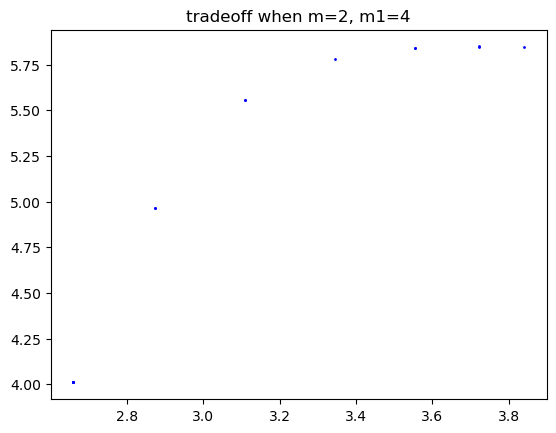

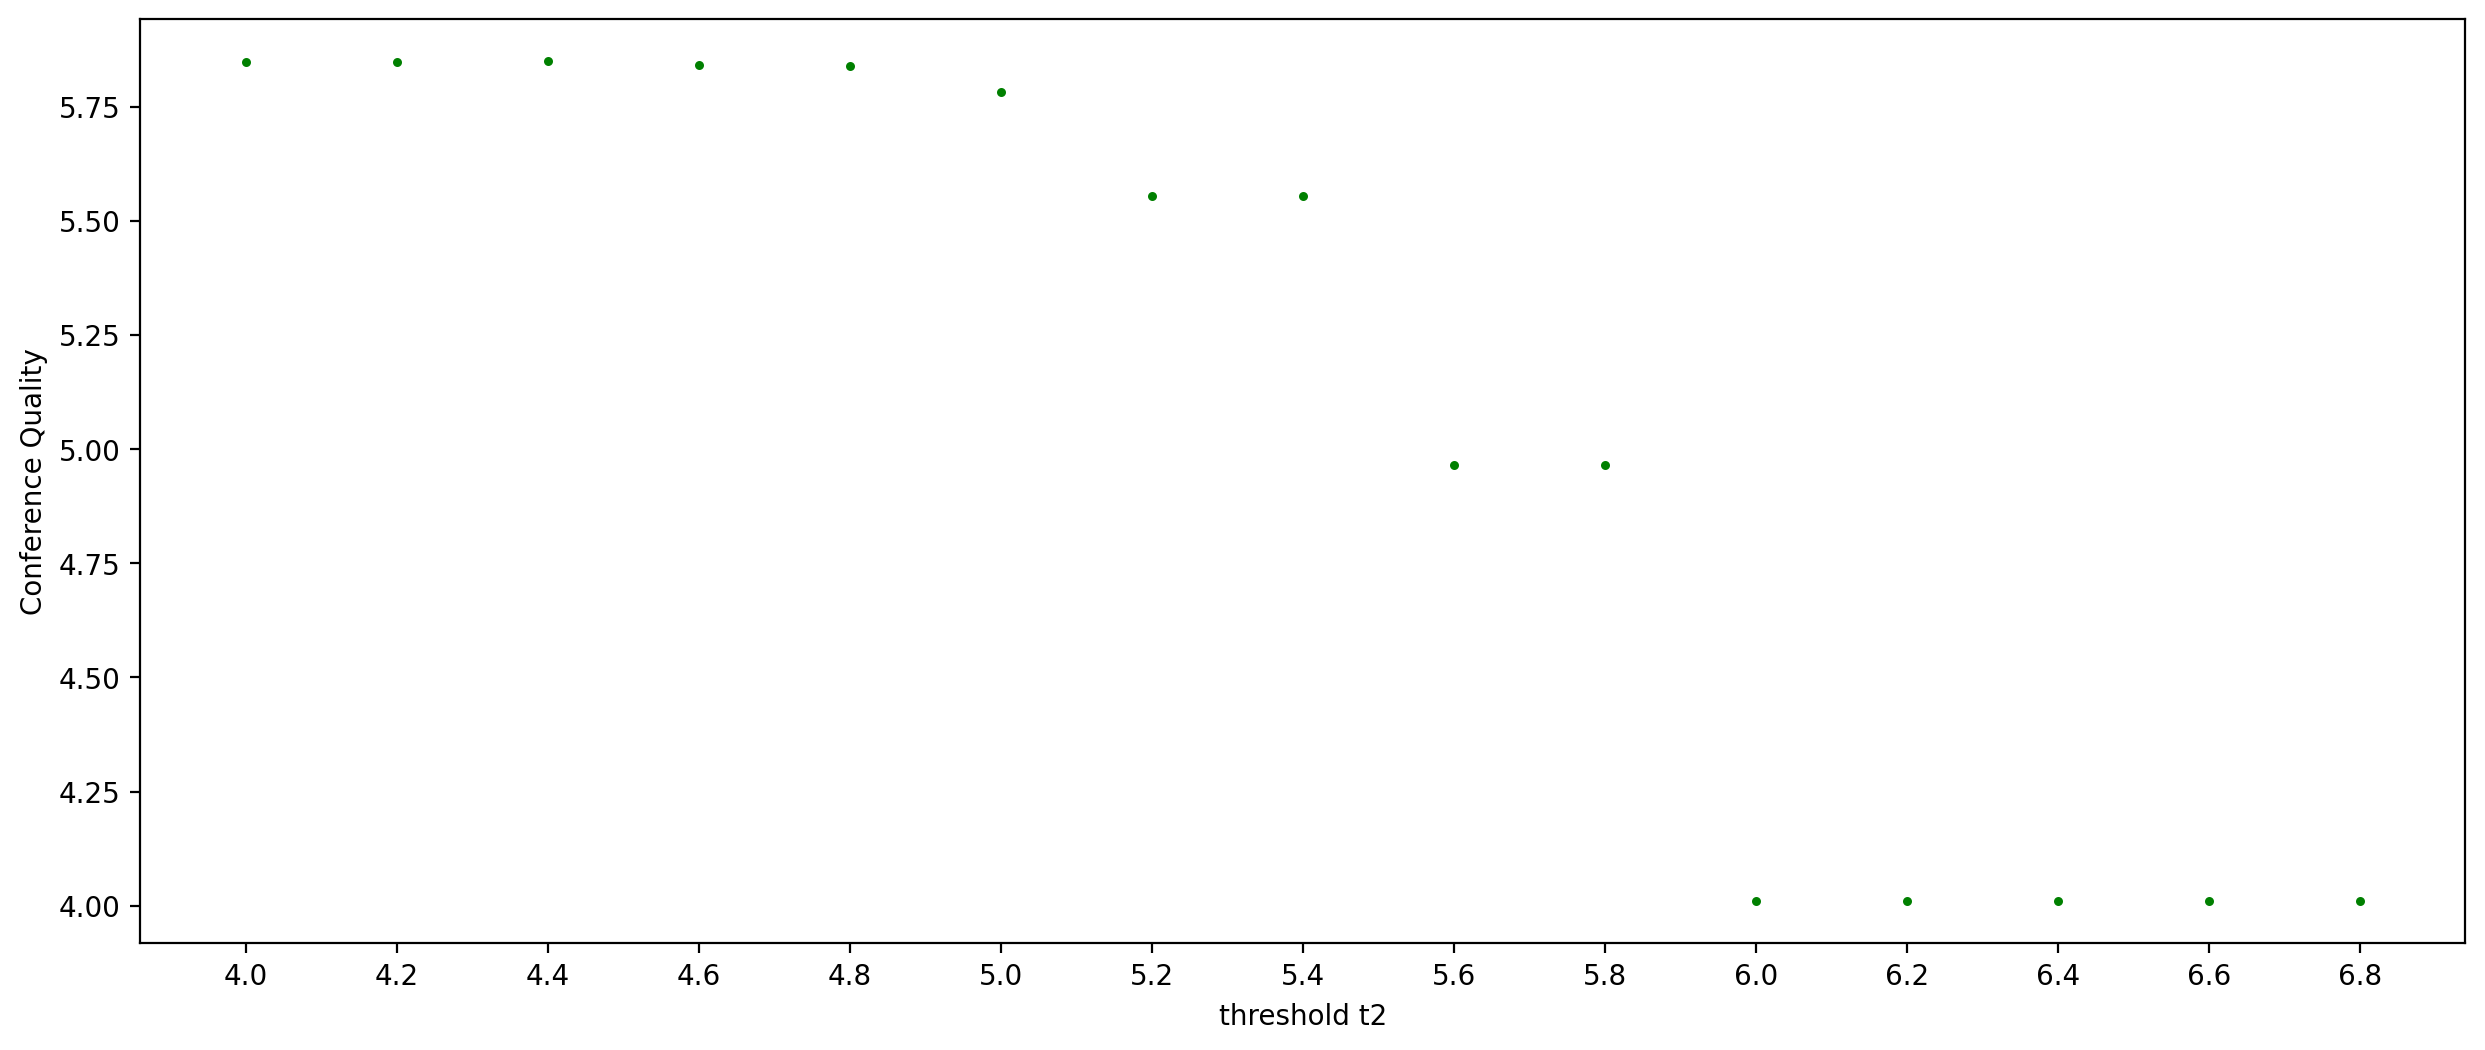

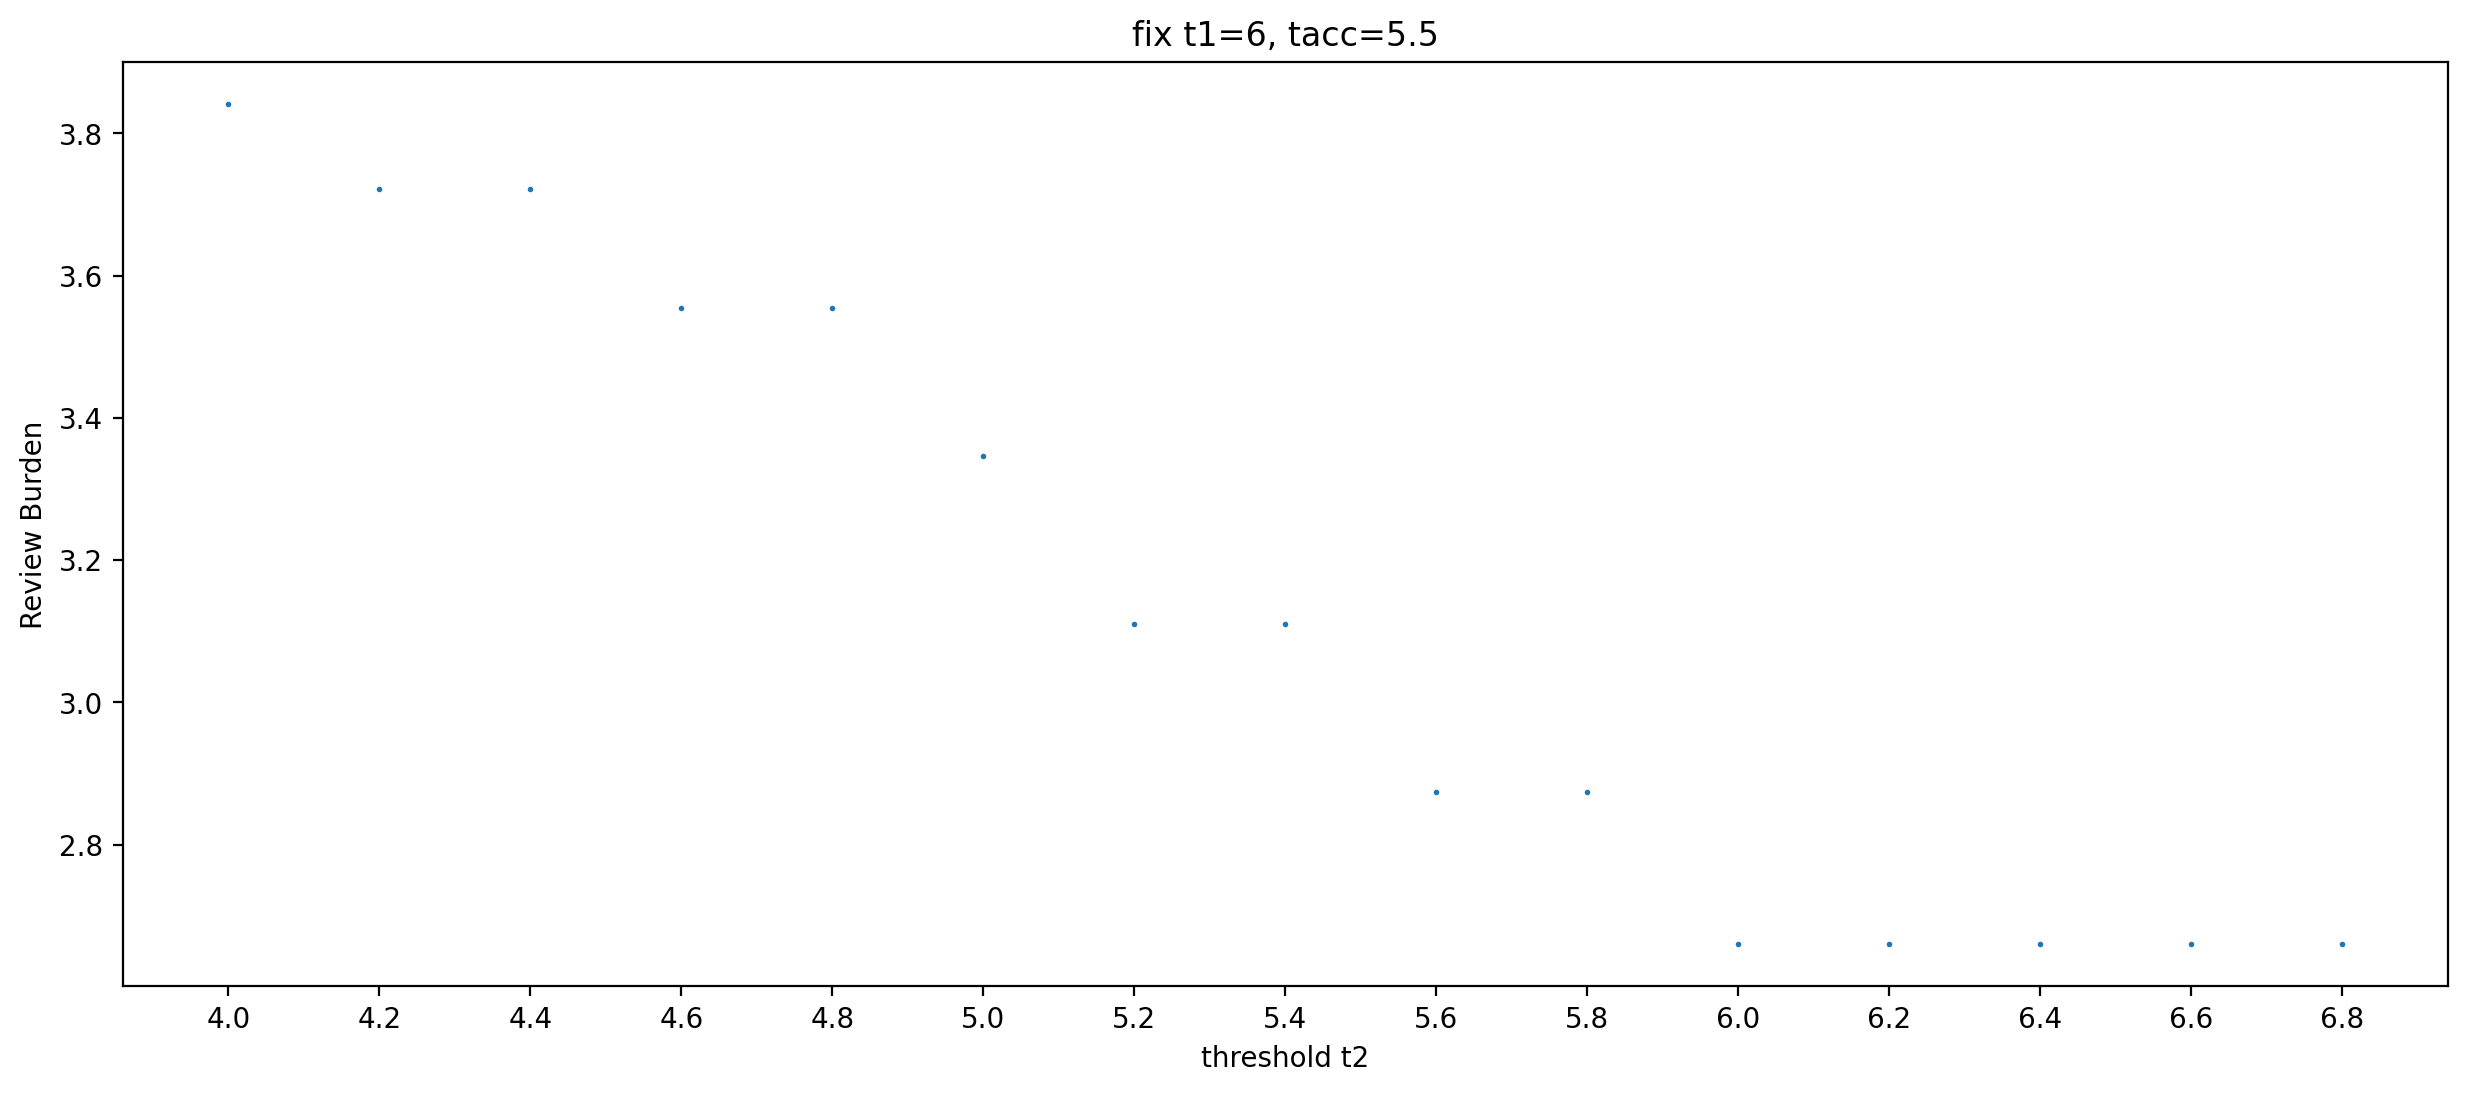

In [97]:
analysis_t2()

In [100]:
import two_phase as tp
# 这里使用没有将字典改为数组的版本，方便操作
para = tp.TwoPhaseParams(10, 2, 4, 5.5, 1.0,-0.513, 5.0, 5.0, 5.0, 1, 10)
prior_s_prob = tp.Compute_s_prior_prob(para)
expected_quality = tp.Expected_quality_of_combinations(para, prior_s_prob)
para_2 = tp.TwoPhaseParams(10, 4, 4, 5.5, 1.0,-0.513, 5.0, 5.0, 5.0, 1, 10)
prior_s_prob_2 = tp.Compute_s_prior_prob(para_2)
expected_quality_2 = tp.Expected_quality_of_combinations(para_2, prior_s_prob_2)

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [124]:
e1 = expected_quality
e2 = expected_quality_2

In [102]:
print(e1)

[2.41556477 2.77970161 3.13199812 ... 0.         0.         0.        ]


In [131]:
print(np.sort(e1[0:100]))

[2.41556477 2.77970161 2.77970161 3.13199812 3.13199812 3.13199812
 3.47640952 3.47640952 3.47640952 3.47640952 3.81644669 3.81644669
 3.81644669 3.81644669 3.81644669 4.1542903  4.1542903  4.1542903
 4.1542903  4.1542903  4.1542903  4.49112682 4.49112682 4.49112682
 4.49112682 4.49112682 4.49112682 4.49112682 4.82754135 4.82754135
 4.82754135 4.82754135 4.82754135 4.82754135 4.82754135 4.82754135
 5.16379608 5.16379608 5.16379608 5.16379608 5.16379608 5.16379608
 5.16379608 5.16379608 5.16379608 5.5        5.5        5.5
 5.5        5.5        5.5        5.5        5.5        5.5
 5.5        5.83620392 5.83620392 5.83620392 5.83620392 5.83620392
 5.83620392 5.83620392 5.83620392 5.83620392 6.17245865 6.17245865
 6.17245865 6.17245865 6.17245865 6.17245865 6.17245865 6.17245865
 6.50887318 6.50887318 6.50887318 6.50887318 6.50887318 6.50887318
 6.50887318 6.8457097  6.8457097  6.8457097  6.8457097  6.8457097
 6.8457097  7.18355331 7.18355331 7.18355331 7.18355331 7.18355331
 7.52359048

In [109]:
np.sort(e2)
print(e2[40:80])

[2.64681464 2.86233347 3.0728416  3.27991177 3.48468305 3.68795935
 3.89029314 4.09205237 4.29347371 4.49470363 2.86233347 3.0728416
 3.27991177 3.48468305 3.68795935 3.89029314 4.09205237 4.29347371
 4.49470363 4.69582921 3.07284159 3.27991179 3.48468305 3.68795935
 3.89029314 4.09205237 4.29347371 4.49470363 4.69582921 4.89690014
 3.27991179 3.48468305 3.68795935 3.89029314 4.09205237 4.29347371
 4.49470363 4.69582921 4.89690014 5.09794369]


# t2和t_acc不变，t1改变

In [132]:
def analysis_t1():
    #t2不变，t1变化
    res = np.load("result_24_t1_new.npy")
    print(res[0])
    print(res[1])
    # 绘制 burden - quality tradeoff
    x = []
    y = []
    t1 = []
    text = []
    for i in res:
        x.append(i[0][0] / 1746)
        y.append(i[0][1] / 5000)
        text.append(i[1])
        t1.append(i[1][0])
    #plt.figure(figsize=(15, 6),dpi=200)
    plt.title("tradeoff when m=2, m1=4")
    plt.scatter(x, y, 1, 'b')
    plt.show()
    plt.figure(figsize=(15, 6),dpi=200)
    plt.title("fix t2=5.5, tacc=4.5")
    plt.xlabel("threshold t1")
    plt.ylabel("Conference Quality")
    plt.xticks(np.arange(5.5,8.1,0.2))
    plt.scatter(t1, y, 1)
    plt.show()
    plt.figure(figsize=(15, 6),dpi=200)
    plt.title("fix t2=5.5, tacc=4.5")
    plt.xlabel("threshold t1")
    plt.ylabel("Review Burden")
    plt.xticks(np.arange(5.5,8.1,0.2))
    plt.scatter(t1, x, 1)
    plt.show()


[[5.06167520e+03 2.63123057e+04 7.84753200e+02 5.61087298e-03]
 [5.50000000e+00 5.50000000e+00 4.50000000e+00 0.00000000e+00]]
[[5.06189640e+03 2.63156385e+04 7.84869000e+02 5.65081702e-03]
 [5.70000000e+00 5.50000000e+00 4.50000000e+00 0.00000000e+00]]


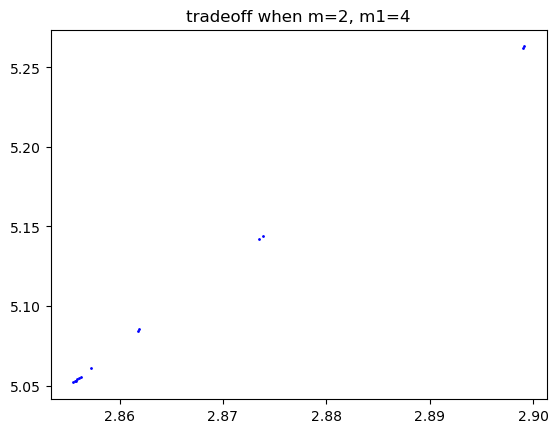

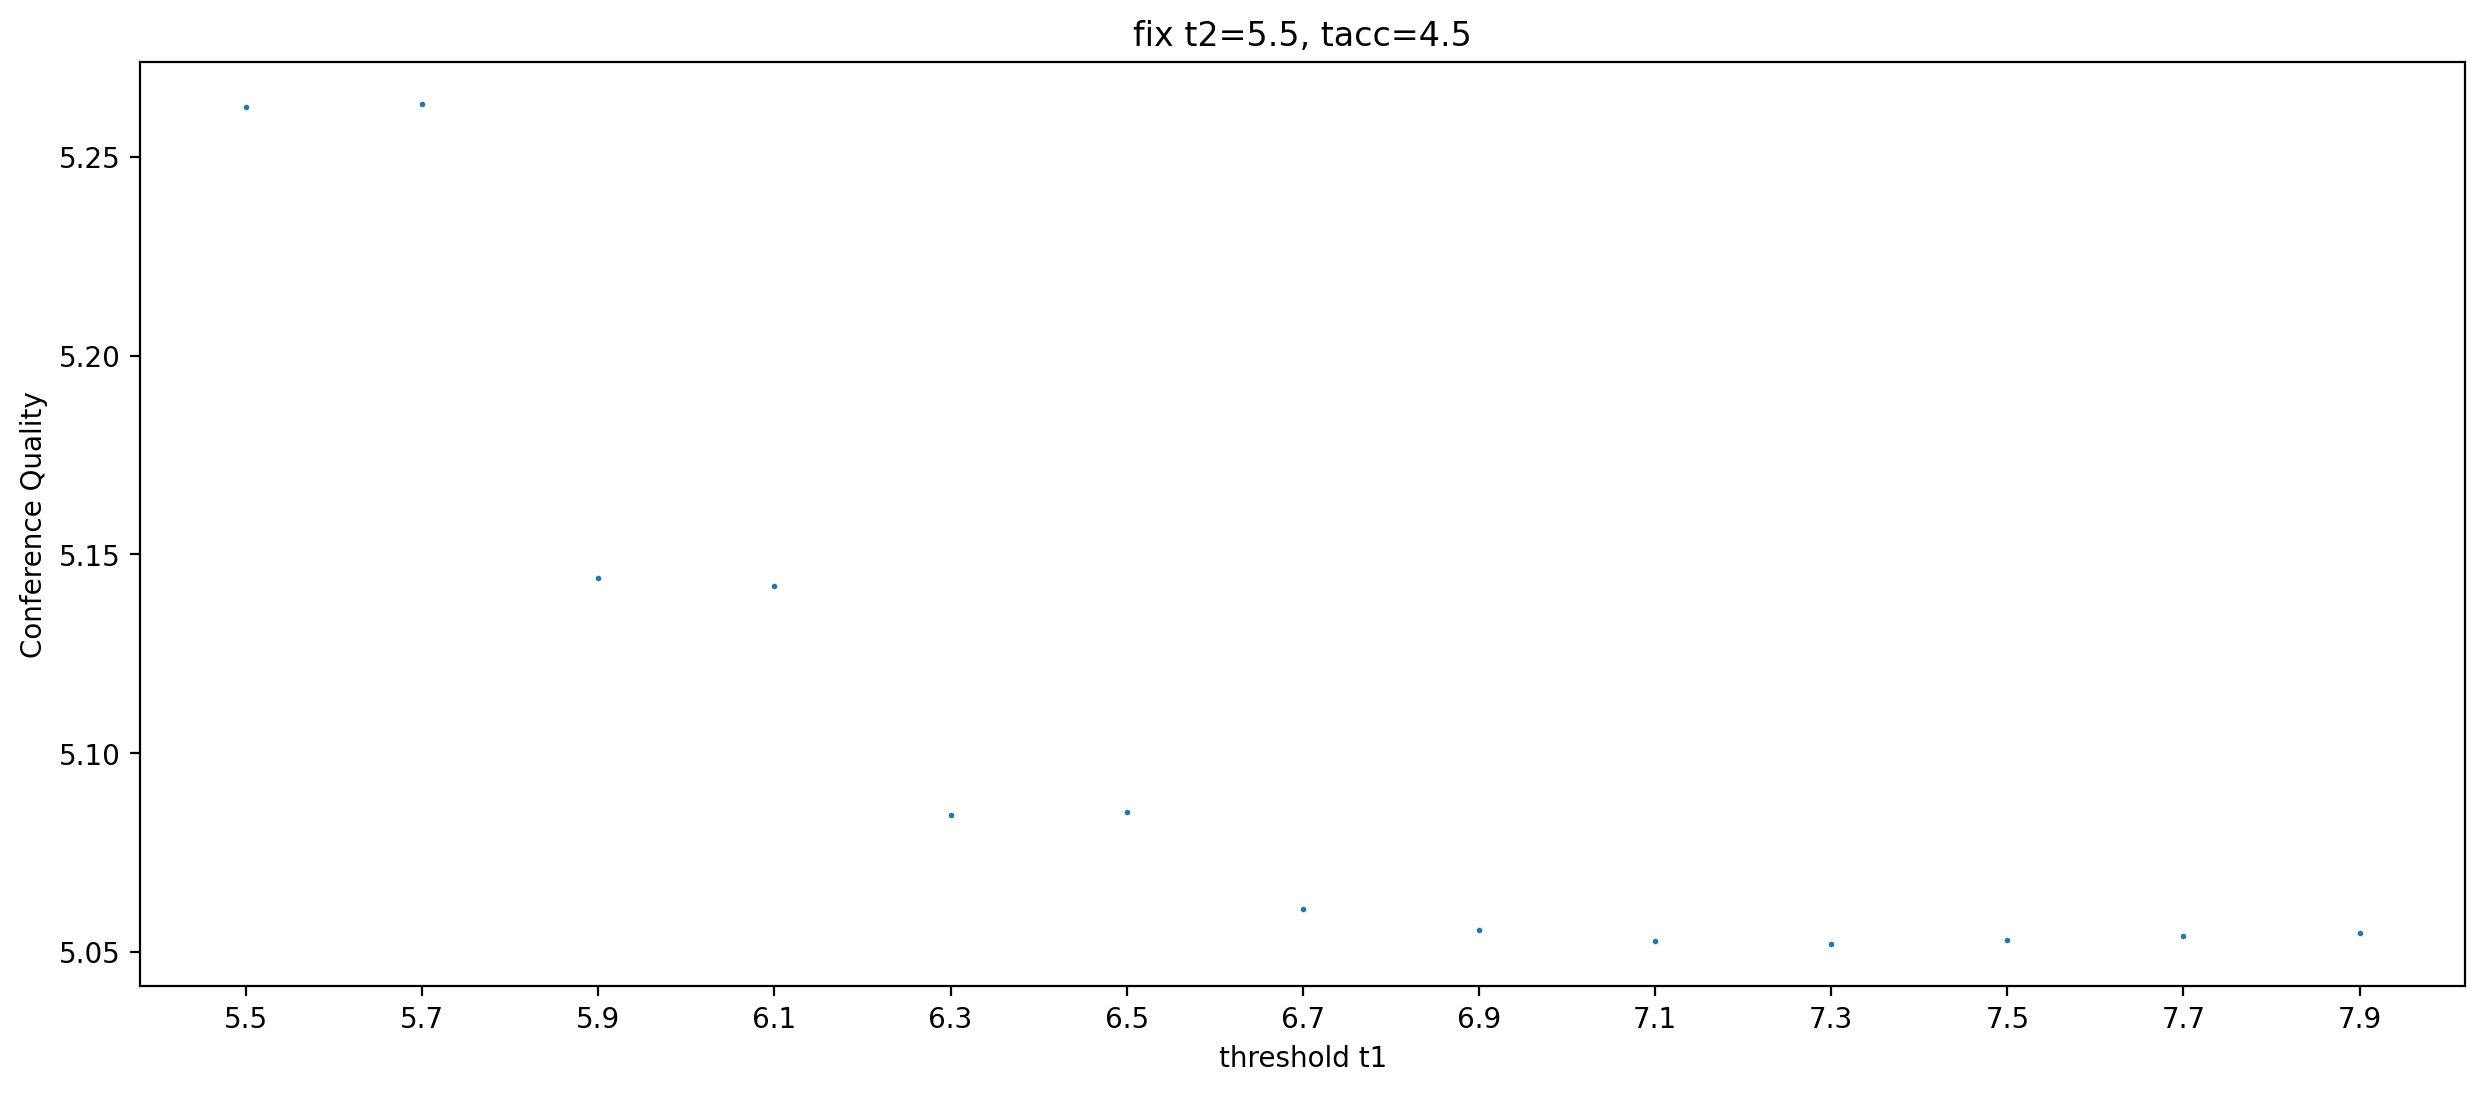

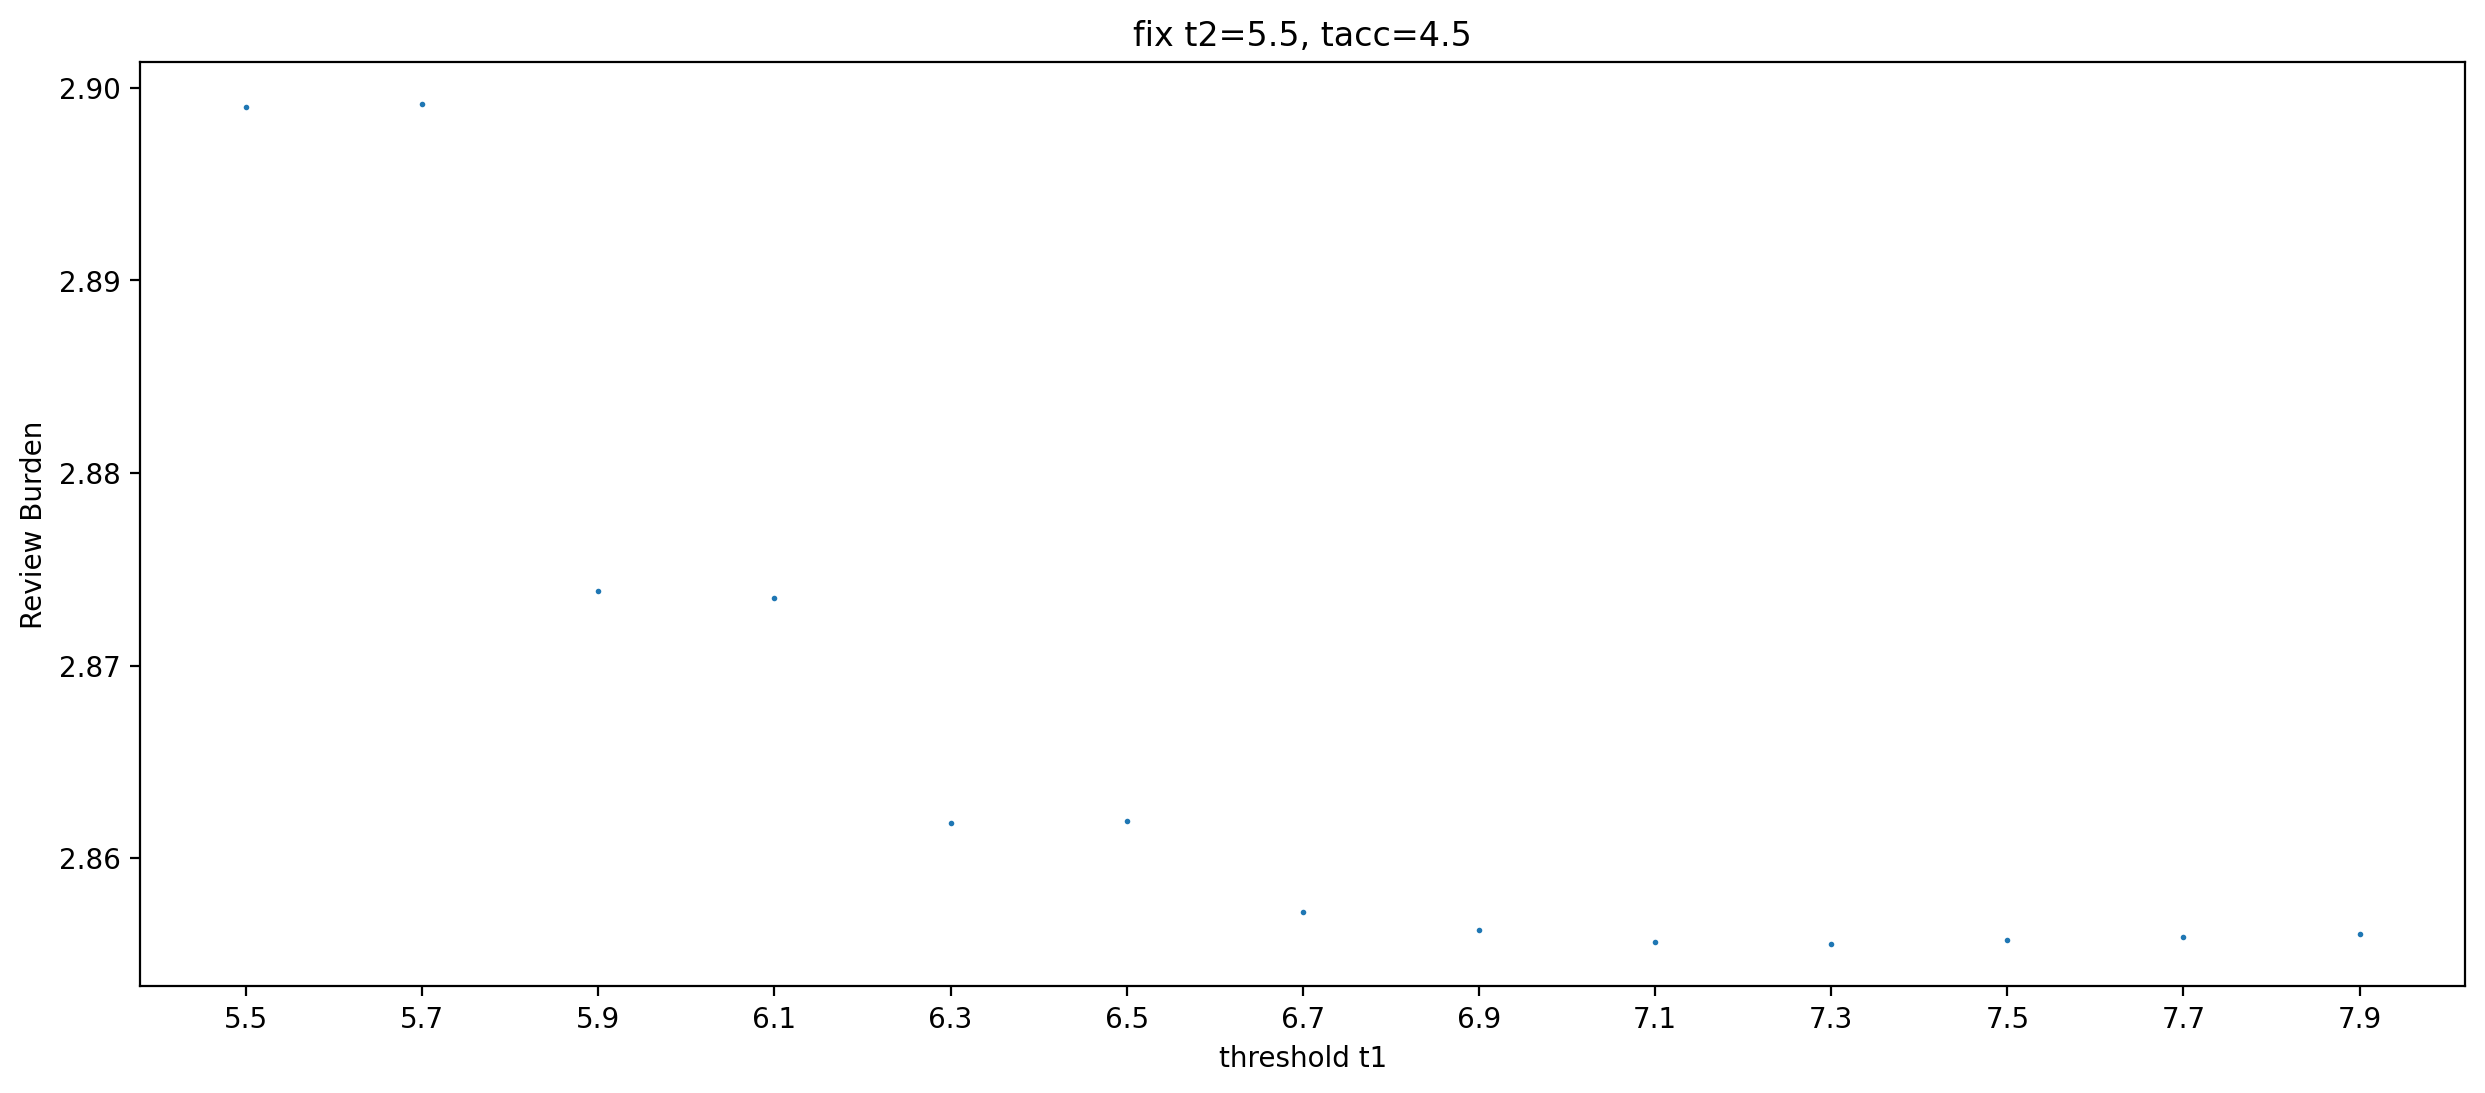

In [133]:
analysis_t1()

# Qj的分布

In [135]:
q = []
with open('sample_q.txt', 'r') as file:
    i = file.readlines()
    for j in i:
        k = j.strip().split(' ')
        q.append(np.array(list(map(float, k))))

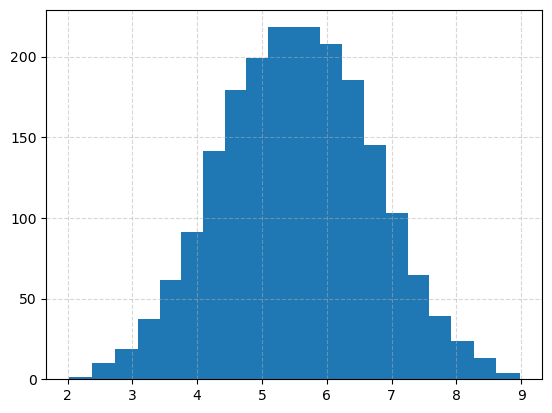

In [142]:
cnt = {}
sample_times = 10
for times in range(sample_times):
    for i in q:
        for j in i:
            t = para.t
            prob_for_sampling = [0]
            scores = np.arange(1, 11)
            temp_sum = 0.0
            for k in range(1, 11):
                temp_sum += np.exp(t*(k-j)**2)
            for k in range(1, 11):
                prob_of_i = np.exp(t*(k-j)**2) / temp_sum#算i中每个s的概率
                prob_for_sampling.append(prob_of_i)
            s_samples = np.random.choice(range(0, 11), 4, p = prob_for_sampling)
            temp_sum = 0
            for k in s_samples[0:2]:
                temp_sum = temp_sum * 10 + k - 1
            Q = expected_quality[int(temp_sum)]
            Q = round(Q, 2)
            if Q in cnt:
                cnt[Q] += 1
            else:
                cnt[Q] = 1
x = []
y = []
for key, value in cnt.items():
    x.append(key)
    y.append(value/sample_times)
plt.grid(ls="--", alpha=0.5)
plt.bar(x, y)
plt.show()

In [143]:
print(x)

[6.51, 6.85, 5.5, 8.22, 5.16, 6.17, 4.83, 3.82, 7.52, 4.49, 7.18, 3.48, 4.15, 8.58, 5.84, 7.87, 2.78, 3.13, 2.42]


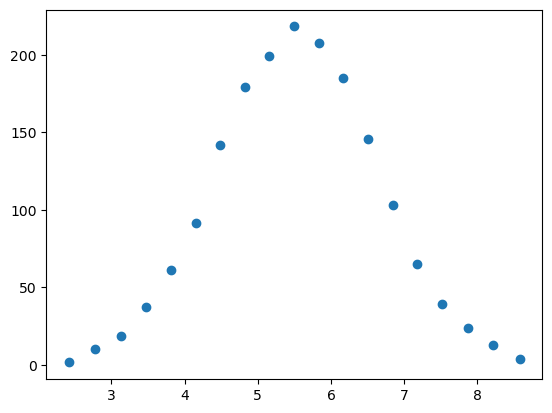

In [144]:
plt.scatter(x, y)
plt.show()